In [1]:
import pandas as pd
import numpy as np

In [2]:
import jieba
from collections import Counter
from src.jieba_nlp_tools import JiebaNlpTools

In [3]:
import matplotlib.pyplot as plt
import wordcloud 

In [4]:
title_df = pd.read_csv("output/FIN_zcgg_title_url.txt")
content_df = pd.read_csv("output/FIN_zcgg_content.txt")

content_df = content_df.iloc[:,1:]

title_df.columns = ["unique_id","timestamp","title","url"]
content_df.columns = ["unique_id","content"]

In [5]:
title_list = list(title_df.title)

In [14]:
content = content_df.content[2]

In [15]:
sentence_list = content.split("。")

In [22]:
sentence = sentence_list[1]

In [17]:
import jieba.posseg as pseg

In [27]:
words = pseg.cut(sentence,cut_all=True)

TypeError: cut() got an unexpected keyword argument 'cut_all'

In [24]:
list(words)

[pair('现', 'tg'),
 pair('将', 'd'),
 pair('有关', 'vn'),
 pair('补助', 'v'),
 pair('资金', 'n'),
 pair('（', 'x'),
 pair('各省', 'r'),
 pair('、', 'x'),
 pair('自治区', 'n'),
 pair('、', 'x'),
 pair('直辖市', 'n'),
 pair('预算', 'v'),
 pair('指标', 'n'),
 pair('见', 'v'),
 pair('附表', 'n'),
 pair('1', 'x'),
 pair('）', 'x'),
 pair('下达', 'v'),
 pair('给', 'p'),
 pair('你们', 'r'),
 pair('，', 'x'),
 pair('并', 'c'),
 pair('就', 'd'),
 pair('有关', 'vn'),
 pair('事项', 'n'),
 pair('通知', 'v'),
 pair('如下', 't'),
 pair('：', 'x'),
 pair('\u3000', 'x'),
 pair('\u3000', 'x'),
 pair('应急', 'vn'),
 pair('物资', 'n'),
 pair('保障体系', 'n'),
 pair('建设', 'vn'),
 pair('资金', 'n'),
 pair('用于', 'v'),
 pair('支持', 'v'),
 pair('地方', 'n'),
 pair('加快', 'v'),
 pair('补齐', 'v'),
 pair('应急', 'vn'),
 pair('物资', 'n'),
 pair('保障', 'v'),
 pair('短板', 'n'),
 pair('，', 'x'),
 pair('健全', 'a'),
 pair('完善', 'v'),
 pair('中央', 'n'),
 pair('和', 'c'),
 pair('地方', 'n'),
 pair('统筹安排', 'n'),
 pair('、', 'x'),
 pair('分级', 'vn'),
 pair('储备', 'vn'),
 pair('、', 'x'),
 pair

# Title Analysis

In [5]:
all_titles = ""
for title in title_list:
    all_titles+=title

In [6]:
jieba_tool = JiebaNlpTools()

Paddle enabled successfully......


In [7]:
word_list = jieba_tool.cut_sentence(all_titles,
                                    cut_all=False,
                                    use_paddle=False,
                                    min_length=2)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/1y/w6y_szxn0m12nsrrdnzgp4540000gn/T/jieba.cache
Loading model cost 1.234 seconds.
Prefix dict has been built successfully.


In [8]:
jieba_tool.get_top_n_words(word_list,n=20)

[('印发', 200),
 ('财政部', 129),
 ('管理', 99),
 ('通知', 95),
 ('明确', 86),
 ('部门', 81),
 ('政策', 80),
 ('资金', 69),
 ('企业', 68),
 ('有关', 66),
 ('关于', 62),
 ('办法', 52),
 ('关税', 50),
 ('政府', 45),
 ('工作', 43),
 ('发文', 42),
 ('支持', 38),
 ('地方', 36),
 ('公告', 33),
 ('国务院', 33)]

In [9]:
stopwords_dir = "src/stopWordsDict.txt"

In [36]:
stopwords_list = []
with open(stopwords_dir) as f:
    for line in f:
        stopwords_list.append(line.strip())

stopwords_list = stopwords_list[0:11]

In [38]:
word_list = jieba_tool.filter_stopwords(word_list,stopwords_list)

In [86]:
kw_tf_noun = jieba_tool.tf_idf(all_titles,20,stopwords_dir,allowPOS=['ns', 'n', 'vn','nr'])
kw_tf_adj = jieba_tool.tf_idf(all_titles,20,stopwords_dir,allowPOS=['a','ad','an'])
kw_tf_verb = jieba_tool.tf_idf(all_titles,20,stopwords_dir,allowPOS=['v','vd','vn'])

In [87]:
kw_tr_noun = jieba.analyse.textrank(all_titles,topK=20, withWeight=True,allowPOS=['ns', 'n', 'vn','nr'])
kw_tr_adj = jieba.analyse.textrank(all_titles,topK=20, withWeight=True,allowPOS=['a','ad','an'])
kw_tr_verb = jieba.analyse.textrank(all_titles,topK=20, withWeight=True,allowPOS=['v','vd','vn'])

In [73]:
word_list = [tup[0] for tup in kw_tf_noun]
freq_list = [tup[1] for tup in kw_tf_noun]

In [96]:
content = content_df.content[4]

In [98]:
print(content)

财库〔2020〕23号党中央有关部门，国务院各部委、各直属机构，全国人大常委会办公厅，全国政协办公厅，最高人民法院，最高人民检察院，各民主党派中央，有关人民团体，各省、自治区、直辖市、计划单列市财政厅（局），新疆生产建设兵团财政局，财政部各地监管局：　　为切实落实减税降费政策，把保就业、保民生、保市场主体等“六保”任务不折不扣落实到位，把已取消、停征、免征及降低征收标准的收费基金优惠政策不折不扣地落实到相关企业和个人，现就加强非税收入退付管理有关事项通知如下：　　各级财政部门要结合本地实际，进一步优化非税收入退付业务流程，提高减税降费涉及非税收入退付工作效率，对实行定期清算、已缴纳款项可冲抵以后月份应缴款的非税收入，要明确冲抵流程和操作办法。各级财政部门和财政部各地监管局要加强配合，对涉及中央地方分成需就地办理退库的非税收入，按照规定加快办理退付。　　各地财政部门要积极推动非税收入电子退付、电子对账等方面的创新。有条件的地方可探索实现非税收入退付申报、业务审核、缴款审核、资金退付等业务网上办理，通过“非接触”退付，助力新冠肺炎疫情防控工作，切实减轻企业和个人负担。　　各级财政部门要认真开展非税收入月度执行情况与减、免、缓、停政策的联动分析，确保政策落实到位。各执收单位要加强内部控制，建立健全非税收入退付内部控制制度，实行退付资金复核制度，认真做好非税收入收缴和退付的核算工作。　　各级财政部门和各执收单位要采取多种形式积极宣传、准确解读减税降费政策要求，确保减税降费红利及时足额惠及缴款企业和个人，增加群众获得感。　　各级财政部门、财政部各地监管局、有关主管部门要结合部门职责，指导和监督各执收单位，及时主动为应予退付的企业和个人办理退付业务，切实缓解企业经营困难。遇到重要或突发情况要及时报告。　　财  政  部　　2020年7月16日


In [102]:
import re

In [101]:
content.split()

['财库〔2020〕23号党中央有关部门，国务院各部委、各直属机构，全国人大常委会办公厅，全国政协办公厅，最高人民法院，最高人民检察院，各民主党派中央，有关人民团体，各省、自治区、直辖市、计划单列市财政厅（局），新疆生产建设兵团财政局，财政部各地监管局：\u3000\u3000为切实落实减税降费政策，把保就业、保民生、保市场主体等“六保”任务不折不扣落实到位，把已取消、停征、免征及降低征收标准的收费基金优惠政策不折不扣地落实到相关企业和个人，现就加强非税收入退付管理有关事项通知如下：\u3000\u3000各级财政部门要结合本地实际，进一步优化非税收入退付业务流程，提高减税降费涉及非税收入退付工作效率，对实行定期清算、已缴纳款项可冲抵以后月份应缴款的非税收入，要明确冲抵流程和操作办法。各级财政部门和财政部各地监管局要加强配合，对涉及中央地方分成需就地办理退库的非税收入，按照规定加快办理退付。\u3000\u3000各地财政部门要积极推动非税收入电子退付、电子对账等方面的创新。有条件的地方可探索实现非税收入退付申报、业务审核、缴款审核、资金退付等业务网上办理，通过“非接触”退付，助力新冠肺炎疫情防控工作，切实减轻企业和个人负担。\u3000\u3000各级财政部门要认真开展非税收入月度执行情况与减、免、缓、停政策的联动分析，确保政策落实到位。各执收单位要加强内部控制，建立健全非税收入退付内部控制制度，实行退付资金复核制度，认真做好非税收入收缴和退付的核算工作。\u3000\u3000各级财政部门和各执收单位要采取多种形式积极宣传、准确解读减税降费政策要求，确保减税降费红利及时足额惠及缴款企业和个人，增加群众获得感。\u3000\u3000各级财政部门、财政部各地监管局、有关主管部门要结合部门职责，指导和监督各执收单位，及时主动为应予退付的企业和个人办理退付业务，切实缓解企业经营困难。遇到重要或突发情况要及时报告。\u3000\u3000财 \xa0政 \xa0部\u3000\u30002020年7月16日']

In [110]:
re.split("。",content)

['财库〔2020〕23号党中央有关部门，国务院各部委、各直属机构，全国人大常委会办公厅，全国政协办公厅，最高人民法院，最高人民检察院，各民主党派中央，有关人民团体，各省、自治区、直辖市、计划单列市财政厅（局），新疆生产建设兵团财政局，财政部各地监管局：\u3000\u3000为切实落实减税降费政策，把保就业、保民生、保市场主体等“六保”任务不折不扣落实到位，把已取消、停征、免征及降低征收标准的收费基金优惠政策不折不扣地落实到相关企业和个人，现就加强非税收入退付管理有关事项通知如下：\u3000\u3000各级财政部门要结合本地实际，进一步优化非税收入退付业务流程，提高减税降费涉及非税收入退付工作效率，对实行定期清算、已缴纳款项可冲抵以后月份应缴款的非税收入，要明确冲抵流程和操作办法',
 '各级财政部门和财政部各地监管局要加强配合，对涉及中央地方分成需就地办理退库的非税收入，按照规定加快办理退付',
 '\u3000\u3000各地财政部门要积极推动非税收入电子退付、电子对账等方面的创新',
 '有条件的地方可探索实现非税收入退付申报、业务审核、缴款审核、资金退付等业务网上办理，通过“非接触”退付，助力新冠肺炎疫情防控工作，切实减轻企业和个人负担',
 '\u3000\u3000各级财政部门要认真开展非税收入月度执行情况与减、免、缓、停政策的联动分析，确保政策落实到位',
 '各执收单位要加强内部控制，建立健全非税收入退付内部控制制度，实行退付资金复核制度，认真做好非税收入收缴和退付的核算工作',
 '\u3000\u3000各级财政部门和各执收单位要采取多种形式积极宣传、准确解读减税降费政策要求，确保减税降费红利及时足额惠及缴款企业和个人，增加群众获得感',
 '\u3000\u3000各级财政部门、财政部各地监管局、有关主管部门要结合部门职责，指导和监督各执收单位，及时主动为应予退付的企业和个人办理退付业务，切实缓解企业经营困难',
 '遇到重要或突发情况要及时报告',
 '\u3000\u3000财 \xa0政 \xa0部\u3000\u30002020年7月16日']

In [111]:
import matplotlib


'/Users/sunnyyang/.matplotlib'

In [115]:
matplotlib.get_configdir()

'/Users/sunnyyang/.matplotlib'

In [113]:
matplotlib.font_manager.FontProperties().get_family()

['sans-serif']

In [114]:
from matplotlib.font_manager import findfont, FontProperties
findfont(FontProperties(family=FontProperties().get_family()))

'/Users/sunnyyang/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

In [116]:
import matplotlib
matplotlib.rcParams['font.sans-serif'] = 'SimHei'

<BarContainer object of 2 artists>

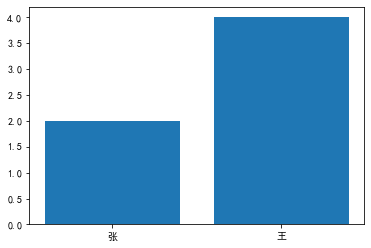

In [118]:
plt.bar(["张","王"],[2,4])